In [20]:
import torch
from torch.autograd import Variable
from torch.autograd import Function
from torchvision import models
from torchvision import utils
import cv2
import sys
import numpy as np
import argparse

In [51]:
import torch.nn.functional as F

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
import grad_cam
reload(grad_cam)

<module 'grad_cam' from 'grad_cam.py'>

In [22]:
vgg = models.vgg19(pretrained=True)

In [119]:
for name, module in vgg.features._modules.items():
    print name, module

0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1 ReLU (inplace)
2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
3 ReLU (inplace)
4 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
5 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
6 ReLU (inplace)
7 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
8 ReLU (inplace)
9 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
10 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
11 ReLU (inplace)
12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
13 ReLU (inplace)
14 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
15 ReLU (inplace)
16 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
17 ReLU (inplace)
18 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
19 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
20 ReLU (inplace)
21 Conv2d(512, 512, kernel_size=(3, 3)

In [121]:
gc = grad_cam.GradCam(model=vgg, target_layer_names=["35"], use_cuda=False)

In [59]:
img = cv2.imread("./examples/both.png", 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
input = grad_cam.preprocess_image(img)

---------

In [123]:
features, output = gc.extractor(input)

torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])


In [125]:
len(features), len(output), features[0].size(), output[0].size()

(1, 1, torch.Size([1, 512, 14, 14]), torch.Size([1000]))

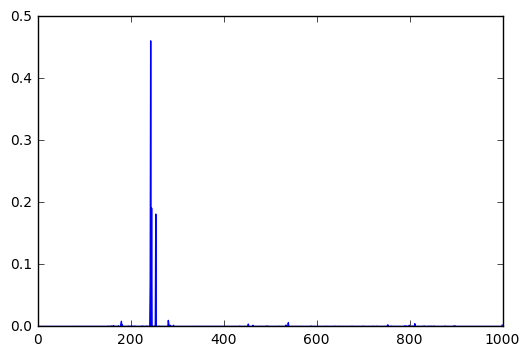

In [126]:
plt.plot(F.softmax(output[0]).data.numpy())

In [ ]:
# so basically this code can compute the gradient of output w.r.t. features

--------

In [137]:
masks = []
for idx in range(25,35):
    gc = grad_cam.GradCam(model=vgg, target_layer_names=[str(idx)], use_cuda=False)
    mask = gc(input, None)
    masks.append(mask)

torch.Size([1, 512, 28, 28]) torch.Size([512, 7, 7])
torch.Size([1, 512, 28, 28]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])
torch.Size([1, 512, 14, 14]) torch.Size([512, 7, 7])


In [139]:
len(masks)

10

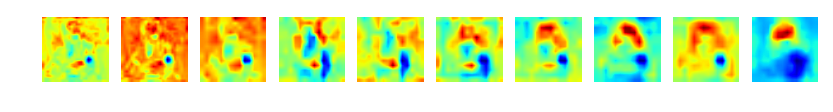

In [144]:
plt.figure(figsize=(10,10))
cc = 0
for i in range(1):
    for j in range(10):
        plt.subplot(1,10,cc+1)
        plt.axis('off')
        plt.imshow(masks[cc])
        cc += 1